In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# for error calculation MSE or MAE or Rsquare
from sklearn.metrics import *
# for spllititing the data_set
from sklearn.model_selection import train_test_split
# For support support vector regression
from sklearn.svm import SVR
# for time execution calculation
from datetime import datetime

In [80]:
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [81]:
dataframe = pd.read_csv('Data/bike_sharing.csv')

In [82]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7199,7200,2011-11-01,4,0,11,14,0,2,1,1,0.5,0.4848,0.48,0.2537,32,118,150


In [83]:
dataframe  = dataframe[['temp','cnt']]

In [84]:
dataframe = dataframe.rename(columns={'temp':'x','cnt':'y'})

In [85]:
dataframe.isna().sum()

x    0
y    0
dtype: int64

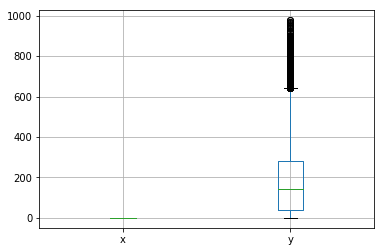

In [86]:
dataframe.boxplot()

In [87]:
dataframe.shape

(17379, 2)

In [88]:
dataframe = preprocess_obj.remove_outlier(dataframe)

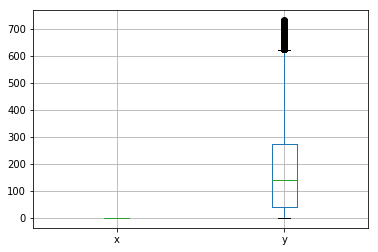

In [89]:
dataframe.boxplot()

In [90]:
dataframe.shape

(17379, 2)

In [91]:
dataframe= dataframe.dropna()

In [92]:
dataframe.shape

(17135, 2)

In [93]:
preprocess_obj.duplicates_count(dataframe)

7529

In [94]:
dataframe = preprocess_obj.remove_Duplicates(dataframe)

In [95]:
dataframe.shape

(9606, 2)

Random Forest Regression


C:\Users\PRAYAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The value for 0.5 degree is  248
Accuracy by r2 score is = -604.6571127979488


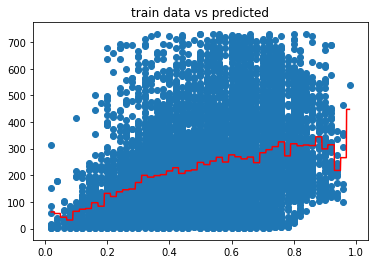

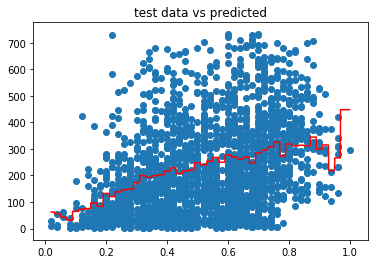

In [96]:
class Random_Forest_Regression:
    
    def __init__(self):
        self.trees = 300
        print("Random Forest Regression")
        
    def plotter(self,X,Y,reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.001)
        plt.title(plot_title)
        plt.plot(X_smooth,reg.predict(X_smooth.reshape(-1,1)),color='r')
        plt.scatter(X,Y)
        plt.show()
    
    def Random_Forest_Regression_demo(self,dataframe):
        # creating Linear regression object
        reg = RandomForestRegressor(n_estimators=self.trees,random_state=0)
        # creating decision regression object with random state =0 as if same function operated any where it'll give same resukt on the same set

        # Splitting independent variables and the output variables
        train_data = dataframe['x'].values
        train_Y = dataframe['y'].values
        # spilling train and test data
        train_data, test_data, train_Y, test_Y = train_test_split(train_data,train_Y, test_size=0.2,random_state=0)
        # geting the values of x till the degree provided
        
        reg.fit(train_data.reshape(-1,1),train_Y.reshape(-1,1))
        
        # predicting the values on basis of our input data
        Ypred = reg.predict(test_data.reshape(-1,1))
        
        print("The value for 0.5 degree is ", int(reg.predict(np.array(0.5).reshape(-1,1))))
        
         # error calculations
        mse = mean_squared_error(Ypred,test_Y)
        mae = mean_absolute_error(Ypred,test_Y)
        r_score = r2_score(Ypred,test_Y)
        accuracy = r_score*100
        print("Accuracy by r2 score is = {}".format(accuracy))
#         print("mae: {}, mse: {}, r2 score: {}".format(mae,mse,r_score))
        
        # plotting
        self.plotter(train_data,train_Y,reg,'train data vs predicted')
        self.plotter(test_data,test_Y,reg,'test data vs predicted')
        
    def main(self,dataframe):
#         try:
        self.Random_Forest_Regression_demo(dataframe)
#         except Exception as e:
#             print("Process stopped because ",e)

if __name__ == '__main__':
    obj = Random_Forest_Regression()
    obj.main(dataframe)